### [Guided Capstone Notebooks for Reference](https://github.com/NBPub/DataScienceGuidedCapstone#submissions)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
teams = pd.read_parquet('data/team_info.parquet')
data = pd.read_parquet('data/game_stats_clean_2.parquet')

### Stats Info, [link](https://theaudl.com/stats/glossary)

#### OFFENSE

 - O-Line Conversion % (Team) - Holds divided by O-line possessions, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 60% O-line conversion percentage. “Atlanta’s O-line has scored on 60% of their offensive possessions.”

 - Hold % (Team) - Holds divided by O-line points, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 80% hold percentage. “Atlanta has scored on 80% of their O-points.”

 - Holds (Team) - Number of times the O-line scored.

 - O-Line Possessions (Team) - Number of times an O-line had possession of the disc with a chance to score.

 - O-Line Points (Team) - Number of pulls the team has received starting a point.

 - Offensive Efficiency (Individual) - Number of times the offense scores when the player is on the field playing offense, regardless of O-line or D-line, divided by the player’s Offensive Possessions, multiplied by 100 (this number will be a percent).

   - Example: Player X has 60% offensive efficiency. “When Player X is on the field and his team has possession, they score on that possession 60 percent of the time.”

 - Offensive Possessions (Individual) - Number of times the player is on offense and the offense has possession of the disc, regardless of O-line or D-line (break chances included).

 

#### DEFENSE

 - D-Line Conversion % (Team) - Breaks divided by D-line possessions, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 40% D-line conversion percentage. “Atlanta’s D-line has scored on 40% of their offensive possessions.”

 - Break % (Team) - Breaks divided by D-line points, multiplied by 100 (this number will be a percent).

   - Example: The Atlanta D-line faced 19 offensive drives in the game, and produced a break on five of them, giving Atlanta a 26% break percentage.

 - Holds (Team) - Number of times the D-line scored.

 - D-Line Possessions (Team) - Number of times a D-line got possession of the disc with a chance to score.

 - D-Line Points (Team) - Number of times the team pulled starting a point.

 - Defensive Efficiency (Team) - Number of times the D-line forces any turnover (block, throwaway, stall, etc) divided by defensive opportunities, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has 30% defensive efficiency. “Atlanta’s D-line forces their opponent to turn it over on 30% of their opponent’s offensive possessions.” OR “Opponents have scored on just 70% of possessions when up against Atlanta’s D-line.”

 - Defensive Opportunities (Team) - Number of times the D-line faces an offensive possession. Total raw opportunities for the defense to force a turnover. 

 - Defensive Efficiency (Individual) - Number of times the defense forces any turnover (block, throwaway, stall, etc) when the player is on the field playing defense, regardless of O-line or D-line, divided by the player’s defensive opportunities, multiplied by 100 (this number will be a percent).

   - Note: Does not matter whether or not it’s the player that forces the turnover, just whether or not the team gets the disc back when the player is out there.

   - Example: Player X has 60% defensive efficiency. “When Player X is on the field and his team is on defense, they get the turnover 60% of the time.”

 - Defensive Opportunities (Individual) - Number of times the player faces an offensive possession, regardless of O-line or D-line. Total raw opportunities for the defense to force a turnover when the specific player is on the field. 

### Cleaning Artifacts: `-1`
### replace -1 values with None
#### will change dtype of columns with empty values from int to float

In [6]:
data.where(data != -1, np.nan, inplace=True)
data.isnull().sum().sum()/(data.shape[0]*data.shape[1])

0.22332191346275854

In [40]:
data.isnull().groupby(data.date.dt.year).sum().T.style\
    .background_gradient(cmap='Spectral_r', axis=None)

date,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
game,0,0,0,0,0,0,0,0,0,0,0
date,0,0,0,0,0,0,0,0,0,0,0
tz,0,0,0,0,0,0,0,0,0,0,0
location,64,101,126,185,193,179,19,0,0,1,0
week,0,0,0,0,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0,0,0,0,0
away,0,0,0,0,0,0,0,0,0,0,0
home_score,0,0,0,0,0,0,0,0,0,0,0
away_score,0,0,0,0,0,0,0,0,0,0,0
away_completions,34,17,2,2,2,0,0,0,0,0,0


## Final Cleaning
#### Remove 2012, 2013 seasons

In [7]:
print(data.shape)
data = data[data.date.dt.year > 2013]
print('removed 2012,2013 seasons')
print(data.shape)

(1491, 37)
removed 2012,2013 seasons
(1326, 37)


### Playground
 - games not symmetrical due to quarters. same concept is possible with traditional halves.
   - therefore calculate break rate and hold rate independently
 - **D Line** possessions per point distribution looks better than poss per break
 - can't decide what's better for **O Line** (pos per pt vs. pos per break)

In [49]:
data[data.home_o_points != data.away_d_points].shape

(89, 39)

In [47]:
data[data.home_d_points != data.away_o_points].shape

(96, 39)

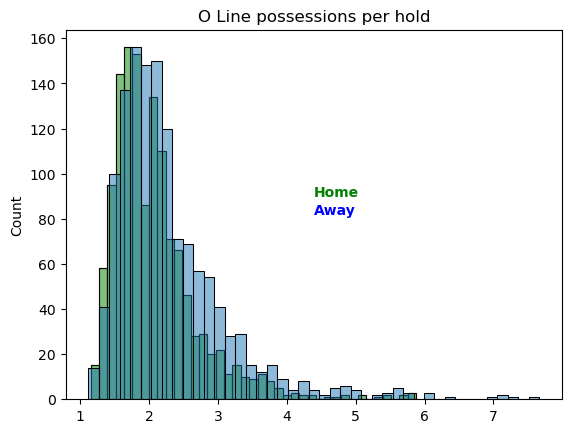

In [68]:
sns.histplot(x=data.home_o_possessions / data.home_o_scores, color='g', alpha=0.5)
sns.histplot(x=data.away_o_possessions / data.away_o_scores, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('O Line possessions per hold')
plt.show()

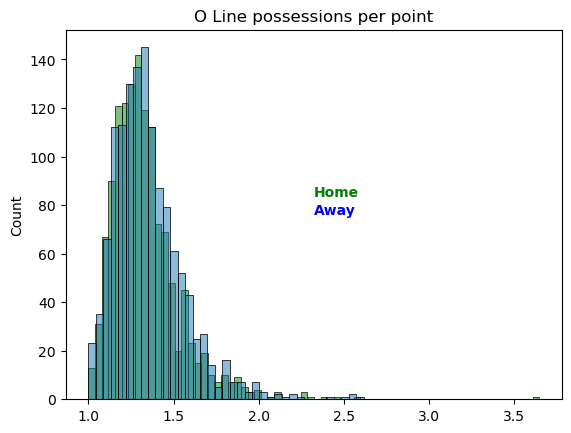

In [69]:
sns.histplot(x=data.home_o_possessions / data.home_o_points, color='g', alpha=0.5)
sns.histplot(x=data.away_o_possessions / data.away_o_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('O Line possessions per point')
plt.show()

In [73]:
data.columns

Index(['game', 'date', 'tz', 'location', 'week', 'home', 'away', 'home_score',
       'away_score', 'away_completions', 'away_throws', 'away_hucks_completed',
       'away_hucks', 'away_blocks', 'away_turnovers', 'away_o_scores',
       'away_o_points', 'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions',
       'home_win', 'home_margin'],
      dtype='object')

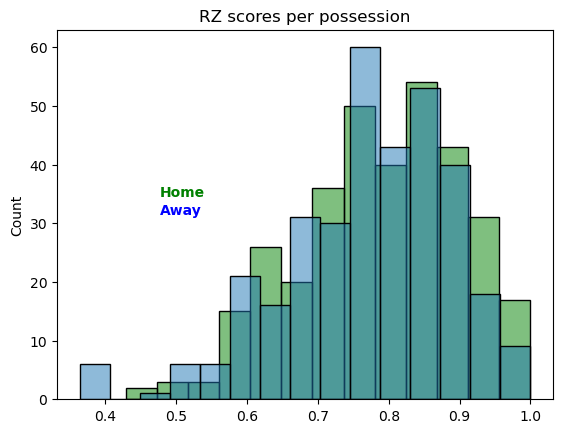

In [78]:
sns.histplot(x=data.home_rz_scores / data.home_rz_possessions, color='g', alpha=0.5)
sns.histplot(x=data.away_rz_scores / data.away_rz_possessions, alpha=0.5)

tx = .7*sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ scores per possession')
plt.show()

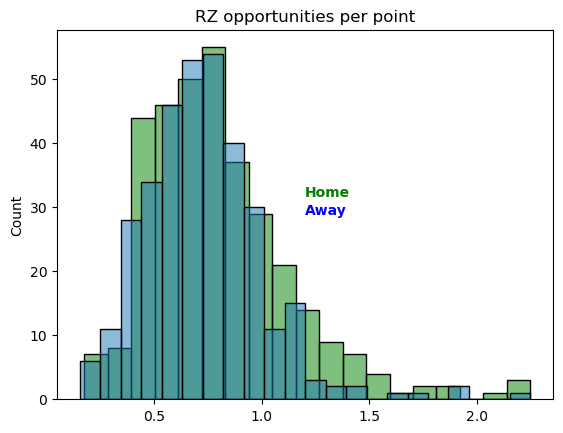

In [80]:
sns.histplot(x=data.home_rz_possessions / data.home_o_points, color='g', alpha=0.5)
sns.histplot(x=data.away_rz_possessions / data.away_o_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ opportunities per point')
plt.show()

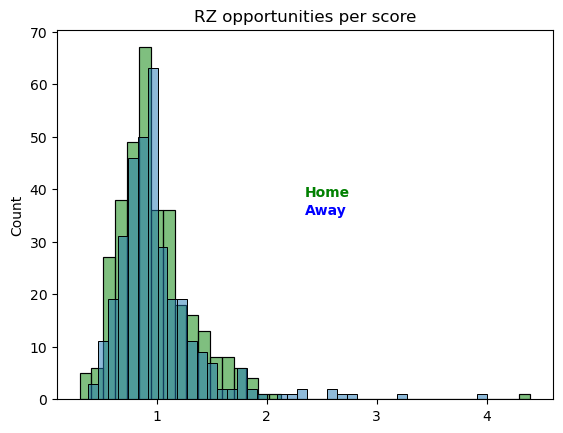

In [87]:
sns.histplot(x=data.home_o_scores / data.home_rz_possessions, color='g', alpha=0.5)
sns.histplot(x= data.away_o_scores/data.away_rz_possessions , alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ opportunities per score')
plt.show()

In [50]:
data[['home_blocks','home_d_possessions']]

,home_blocks,home_d_possessions
2061,15,15.0
2059,9,8.0
2057,11,15.0
2058,5,11.0
2062,13,9.0
...,...,...
2973,11,9.0
3046,9,15.0
3006,12,10.0
3047,11,10.0


In [56]:
(data.home_d_possessions / data.home_d_points).describe()

count    1325.000000
mean        0.677752
std         0.268278
min         0.066667
25%         0.500000
50%         0.645161
75%         0.827586
max         1.950000
dtype: float64

In [59]:
(data.home_d_possessions / data.home_d_points).describe()

count    1325.000000
mean        0.677752
std         0.268278
min         0.066667
25%         0.500000
50%         0.645161
75%         0.827586
max         1.950000
dtype: float64

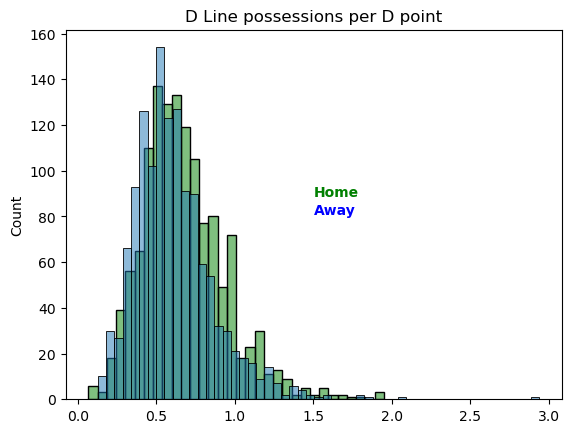

In [62]:
sns.histplot(x=data.home_d_possessions/data.home_d_points, color='g', alpha=0.5)
sns.histplot(x=data.away_d_possessions/data.away_d_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line possessions per D point')
plt.show()

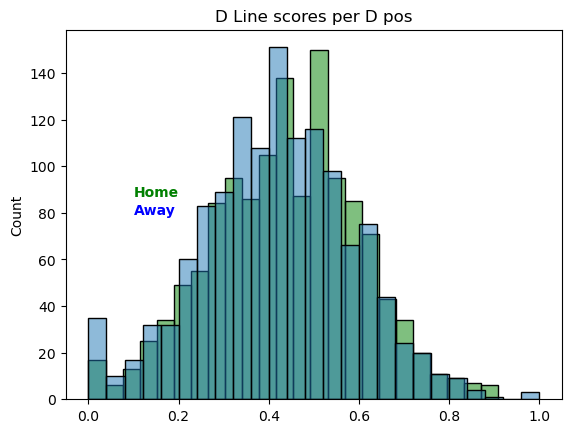

In [72]:
sns.histplot(x=data.home_d_scores/data.home_d_possessions, color='g', alpha=0.5)
sns.histplot(x=data.away_d_scores/data.away_d_possessions, alpha=0.5)

tx = .2*sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line scores per D pos')
plt.show()

## Add Success Criteria: 
#### Home Win
#### Home Margin

In [8]:
data.loc[:,'home_win'] = data.home_score > data.away_score
data.loc[:,'home_margin'] = data.home_score - data.away_score

In [11]:
# should skip over location
data.corr(numeric_only=True).loc[['home_margin','home_win'],:].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
location,-0.020,-0.036
home_score,0.726,0.558
away_score,-0.696,-0.531
away_completions,-0.025,-0.030
away_throws,0.058,0.027
away_hucks_completed,-0.168,-0.120
away_hucks,0.038,0.051
away_blocks,-0.432,-0.392
away_turnovers,0.519,0.356
away_o_scores,-0.156,-0.069


### PCA with basic stats
 - recall that without scaling, features with higher magnitudes will have more effect
 - for example throws/completions would dominate without scaling

In [48]:
data.columns[9:37]

Index(['away_completions', 'away_throws', 'away_hucks_completed', 'away_hucks',
       'away_blocks', 'away_turnovers', 'away_o_scores', 'away_o_points',
       'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions'],
      dtype='object')

In [131]:
drop_cols = ['away_hucks_completed','away_hucks','home_hucks_completed','home_hucks', 
             'away_rz_scores', 'away_rz_possessions', 'home_rz_scores', 'home_rz_possessions',
             ]

In [132]:
scaled_data_1 = data.iloc[:,9:37]
scaled_data_1.shape

(1326, 28)

In [133]:
scaled_data_1.drop(columns=drop_cols, inplace=True)
scaled_data_1.shape

(1326, 20)

In [134]:
scaled_data_1.dropna(inplace=True)
scaled_data_1.shape

(1320, 20)

In [53]:
scaled_data_1.isnull().groupby(data.date.dt.year).sum().T.style.background_gradient(cmap='Spectral_r', axis=None)

date,2014,2015,2016,2017,2018,2019,2021,2022,2023
away_completions,0,0,0,0,0,0,0,0,0
away_throws,0,0,0,0,0,0,0,0,0
away_blocks,0,0,0,0,0,0,0,0,0
away_turnovers,0,0,0,0,0,0,0,0,0
away_o_scores,0,0,0,0,0,0,0,0,0
away_o_points,0,0,0,0,0,0,0,0,0
away_o_possessions,0,0,0,0,0,0,0,0,0
away_d_scores,0,0,0,0,0,0,0,0,0
away_d_points,0,0,0,0,0,0,0,0,0
away_d_possessions,0,0,0,0,0,0,0,0,0


In [135]:
 # save for labelling
col_names = scaled_data_1.columns
home_teams = data.loc[scaled_data_1.index,'home']

# scale
scaled_data_1 = scale(scaled_data_1)
# save into df
scaled_df = pd.DataFrame(scaled_data_1, columns = col_names)

In [55]:
scaled_data_1.mean(), scaled_data_1.std(ddof=0)

(-5.4905575036007744e-17, 0.9999999999999999)

In [136]:
pca1 = PCA().fit(scaled_data_1)

In [57]:
pca1.explained_variance_ratio_

array([3.34355584e-01, 2.22956716e-01, 1.75348950e-01, 1.14292695e-01,
       6.77216258e-02, 3.16697065e-02, 1.99364224e-02, 1.33580641e-02,
       1.22887574e-02, 2.78644325e-03, 2.13311062e-03, 1.34044662e-03,
       5.55389560e-04, 4.17882298e-04, 2.97626453e-04, 2.61406045e-04,
       1.49047929e-04, 1.30124643e-04, 8.34675332e-33, 1.50049818e-33])

In [58]:
pca1.explained_variance_ratio_.cumsum()

array([0.33435558, 0.5573123 , 0.73266125, 0.84695395, 0.91467557,
       0.94634528, 0.9662817 , 0.97963977, 0.99192852, 0.99471497,
       0.99684808, 0.99818852, 0.99874391, 0.99916179, 0.99945942,
       0.99972083, 0.99986988, 1.        , 1.        , 1.        ])

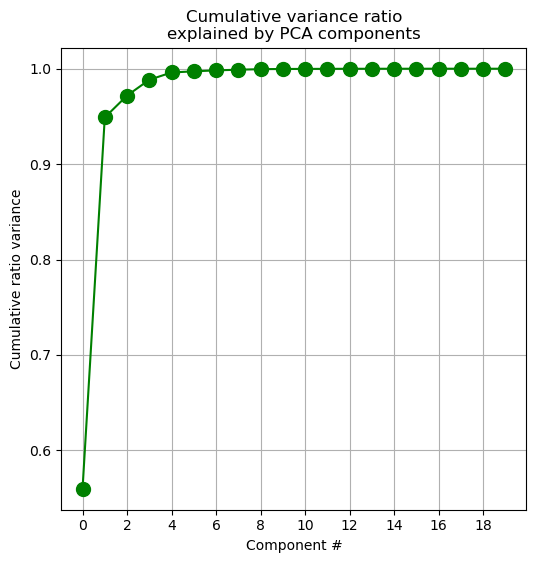

In [129]:
plt.subplots(figsize=(6, 6))
plt.plot(pca1.explained_variance_ratio_.cumsum(), 'g-o', markersize=10)
plt.grid()
plt.xticks(range(0,20,2))
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio\nexplained by PCA components')
plt.savefig('graphs/PCA1_Explained_variance_cumsum.png')
plt.show()

In [137]:
pd.DataFrame(pca1.components_, columns=col_names).iloc[0:5,:].T.style\
    .background_gradient('PiYG', axis=None)

,0,1,2,3,4
away_completions,-0.025097,-0.216435,0.112028,0.425432,-0.490818
away_throws,0.010394,-0.190704,0.061766,0.450450,-0.511254
away_blocks,-0.159466,0.205365,-0.304179,0.076721,-0.118908
away_turnovers,0.228749,0.201420,-0.337673,0.081708,-0.041026
away_o_scores,-0.094508,-0.412576,-0.131048,-0.002694,0.182554
away_o_points,0.244350,-0.308310,-0.188932,0.010478,0.045867
away_o_possessions,0.283316,-0.109354,-0.310002,0.029024,0.028815
away_d_scores,-0.311439,0.075194,-0.141477,0.036299,-0.093901
away_d_points,-0.286355,-0.239537,-0.203368,0.022503,0.054343
away_d_possessions,-0.269775,0.196758,-0.260367,0.092404,-0.056608


## Add Derived Stats, efficiency / effectiveness stats
##### be sure not to repeat from home and away perspectives

 - completions / throws
 - hucks_completed / hucks
 - blocks / opponent throws
 - O scores per point
 - O possessions per O score
 - D possessions per O score
 - D possessions per D score

In [9]:
### OFFENSE

# comp %
data['home_completion_rate'] = data.home_completions / data.home_throws
data['away_completion_rate'] = data.away_completions / data.away_throws

# huck %
data['home_huck_rate'] = data.home_hucks_completed / data.home_hucks
data['away_huck_rate'] = data.away_hucks_completed / data.away_hucks

# hold %
data['home_hold_rate'] = data.home_o_scores / data.home_o_points
data['away_hold_rate'] = data.away_o_scores / data.away_o_points

# O Line possessions per hold
data['home_o_poss_per_hold'] = data.home_o_possessions / data.home_o_scores
data['away_o_poss_per_hold'] = data.away_o_possessions / data.away_o_scores

### DEFENSE

# block %
data['home_block_rate'] = data.home_blocks / data.away_throws
data['away_block_rate'] = data.away_blocks / data.home_throws

# break %, games not perfectly symmetrical so calculate in addition to hold %
data['home_break_rate'] = data.home_d_scores / data.home_d_points
data['away_break_rate'] = data.away_d_scores / data.away_d_points

# D Line possessions per point
data['home_d_poss_per_hold'] = data.home_d_possessions / data.home_d_points
data['away_d_poss_per_hold'] = data.away_d_possessions / data.away_d_points

# D Line breaks per possession
data['home_break_per_poss'] = data.home_d_scores / data.home_d_possessions
data['away_break_per_poss'] = data.away_d_scores / data.away_d_possessions

### REDZONE

# redzone efficiency
data['home_rz_rate'] = data.home_rz_scores / data.home_rz_possessions
data['away_rz_rate'] = data.away_rz_scores / data.away_rz_possessions

## Investigate Correlations with new stuff


In [92]:
data.columns[9:]

Index(['away_completions', 'away_throws', 'away_hucks_completed', 'away_hucks',
       'away_blocks', 'away_turnovers', 'away_o_scores', 'away_o_points',
       'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions',
       'home_win', 'home_margin', 'home_completion_rate',
       'away_completion_rate', 'home_huck_rate', 'away_huck_rate',
       'home_hold_rate', 'away_hold_rate', 'home_o_poss_per_hold',
       'away_o_poss_per_hold', 'home_block_rate', 'away_block_rate',
       'home_break_rate', 'away_break_rate', 'home_d_poss_per_hold',
       'away_d_poss_per_hold', 'home_break_per_poss', 'away_break_per_poss',
       'home_rz_rat

In [119]:
# new stats
data.iloc[:,9:].corr(numeric_only=True).loc[['home_margin','home_win'],:].iloc[:,30:].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
home_completion_rate,0.184,0.175
away_completion_rate,-0.288,-0.194
home_huck_rate,0.196,0.184
away_huck_rate,-0.260,-0.223
home_hold_rate,0.750,0.615
away_hold_rate,-0.806,-0.619
home_o_poss_per_hold,-0.534,-0.444
away_o_poss_per_hold,0.627,0.397
home_block_rate,0.320,0.233
away_block_rate,-0.236,-0.218


In [124]:
# old stats stats
data.iloc[:,9:].corr(numeric_only=True).loc[['home_margin','home_win'],:].iloc[:,:28].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
away_completions,-0.025,-0.030
away_throws,0.058,0.027
away_hucks_completed,-0.168,-0.120
away_hucks,0.038,0.051
away_blocks,-0.432,-0.392
away_turnovers,0.519,0.356
away_o_scores,-0.156,-0.069
away_o_points,0.704,0.546
away_o_possessions,0.702,0.523
away_d_scores,-0.810,-0.676


In [108]:
for i,val in enumerate(data.columns):
    print(i,val)

0 game
1 date
2 tz
3 location
4 week
5 home
6 away
7 home_score
8 away_score
9 away_completions
10 away_throws
11 away_hucks_completed
12 away_hucks
13 away_blocks
14 away_turnovers
15 away_o_scores
16 away_o_points
17 away_o_possessions
18 away_d_scores
19 away_d_points
20 away_d_possessions
21 away_rz_scores
22 away_rz_possessions
23 home_completions
24 home_throws
25 home_hucks_completed
26 home_hucks
27 home_blocks
28 home_turnovers
29 home_o_scores
30 home_o_points
31 home_o_possessions
32 home_d_scores
33 home_d_points
34 home_d_possessions
35 home_rz_scores
36 home_rz_possessions
37 home_win
38 home_margin
39 home_completion_rate
40 away_completion_rate
41 home_huck_rate
42 away_huck_rate
43 home_hold_rate
44 away_hold_rate
45 home_o_poss_per_hold
46 away_o_poss_per_hold
47 home_block_rate
48 away_block_rate
49 home_break_rate
50 away_break_rate
51 home_d_poss_per_hold
52 away_d_poss_per_hold
53 home_break_per_poss
54 away_break_per_poss
55 home_rz_rate
56 away_rz_rate


In [148]:
not param

True

In [143]:
x[0][0].title.get_text()

'away_completions'

In [158]:
data[['home_o_points','home_margin']].corr().iloc[0,1]

-0.6824792953461296

<Axes: xlabel='away_completions', ylabel='home_margin'>

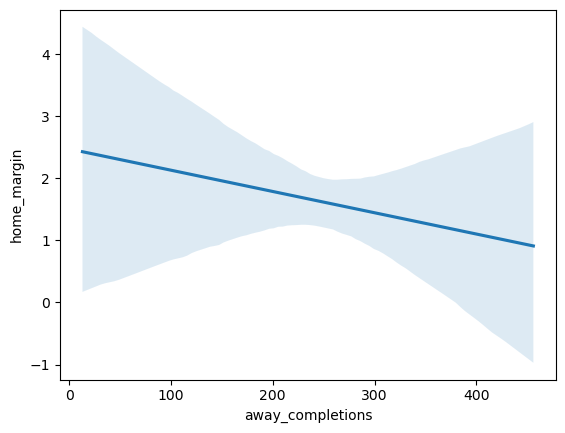

In [132]:
sns.regplot(data, x='away_completions', y='home_margin', scatter=False)

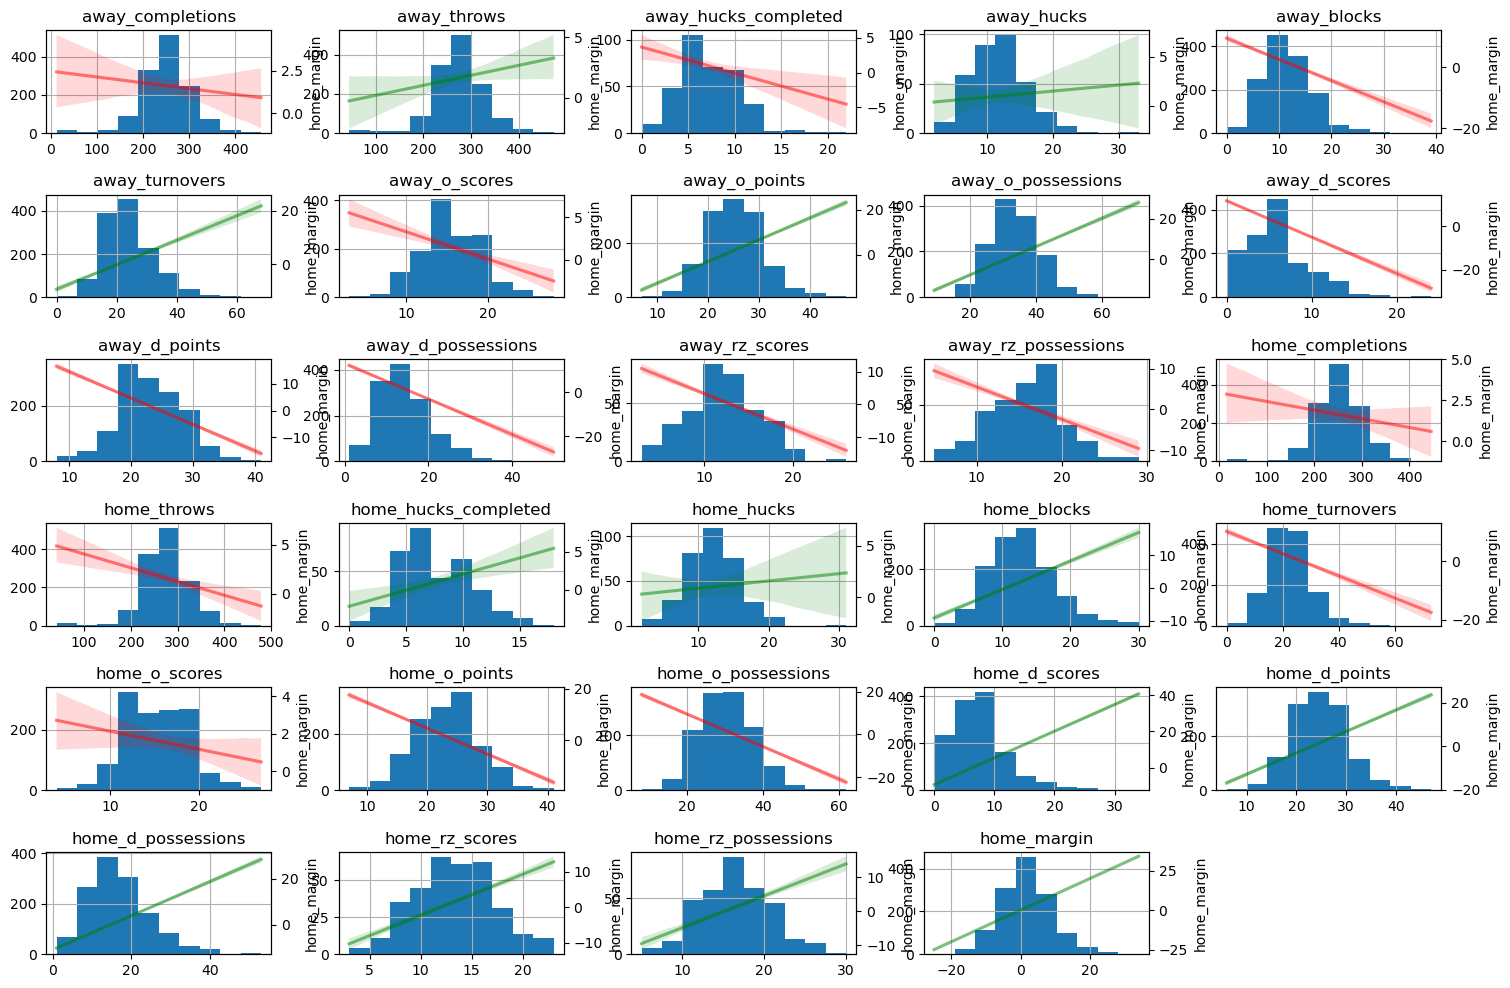

In [161]:
x = data.iloc[:,9:39].hist(figsize=(18,12))
plt.subplots_adjust(hspace=0.6)
for row in x:
    for graph in row:
        param = graph.title.get_text()
        if param:
            c = 'g' if data[[param,'home_margin']].corr().iloc[0,1] > 0 else 'r'
            sns.regplot(data, x=param, y='home_margin', scatter=False,
                   ax = graph.twinx(), color=c, line_kws=dict(alpha=0.5))

#plt.savefig('data/initial_distributions.png', dpi=300)
plt.show()

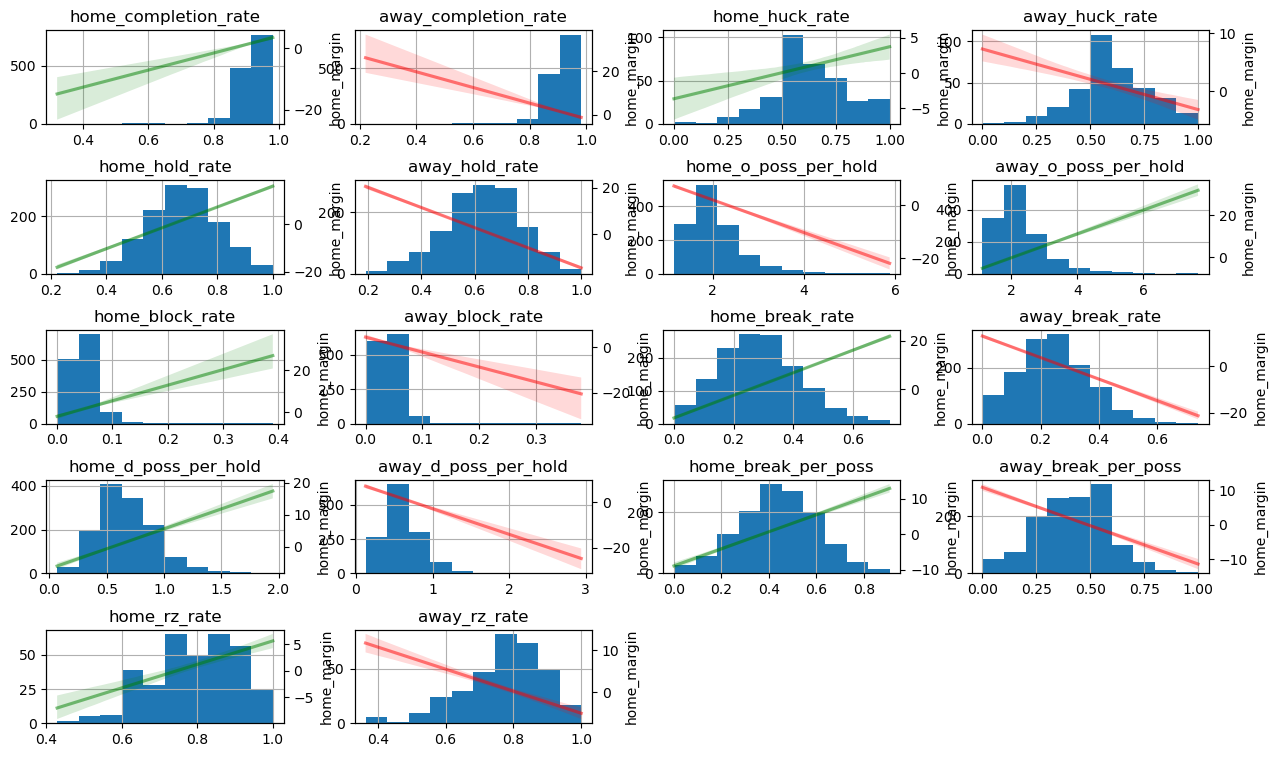

In [164]:
# sub = data.iloc[:,39:]

x = data.iloc[:,39:].hist(figsize=(15,9))
plt.subplots_adjust(hspace=0.6)

for row in x:
    for graph in row:
        param = graph.title.get_text()
        if param:
            c = 'g' if data[[param,'home_margin']].corr().iloc[0,1] > 0 else 'r'
            sns.regplot(data, x=param, y='home_margin', scatter=False,
                   ax = graph.twinx(), color=c, line_kws=dict(alpha=0.5))

#plt.savefig('data/initial_distributions.png', dpi=300)
plt.show()

## PCA with derived stats
 - take subset of data
 - drop null cols,rows
 - scale data
   - store column names and index
 - do PCA stuff
#### Which features to include / remove?

In [10]:
data.columns[39:]

Index(['home_completion_rate', 'away_completion_rate', 'home_huck_rate',
       'away_huck_rate', 'home_hold_rate', 'away_hold_rate',
       'home_o_poss_per_hold', 'away_o_poss_per_hold', 'home_block_rate',
       'away_block_rate', 'home_break_rate', 'away_break_rate',
       'home_d_poss_per_hold', 'away_d_poss_per_hold', 'home_break_per_poss',
       'away_break_per_poss', 'home_rz_rate', 'away_rz_rate'],
      dtype='object')

In [11]:
drop_cols = ['away_huck_rate','away_rz_rate','home_huck_rate','home_rz_rate',
            ]

In [12]:
scaled_data_2 = data.iloc[:,39:]
scaled_data_2.drop(columns=drop_cols,inplace=True)
scaled_data_2.dropna(inplace=True)
scaled_data_2.shape

(1320, 14)

In [13]:
 # save for labelling
col_names = scaled_data_2.columns
#home_teams = data.loc[scaled_data_2.index,'home']

# scale
scaled_data_2 = scale(scaled_data_2)
# save into df
scaled_df = pd.DataFrame(scaled_data_2, columns = col_names)

# confirm scaling
scaled_data_2.mean(), scaled_data_2.std(ddof=0)

(1.3764843041240035e-16, 1.0)

In [14]:
# fit pca
pca2 = PCA().fit(scaled_data_2)

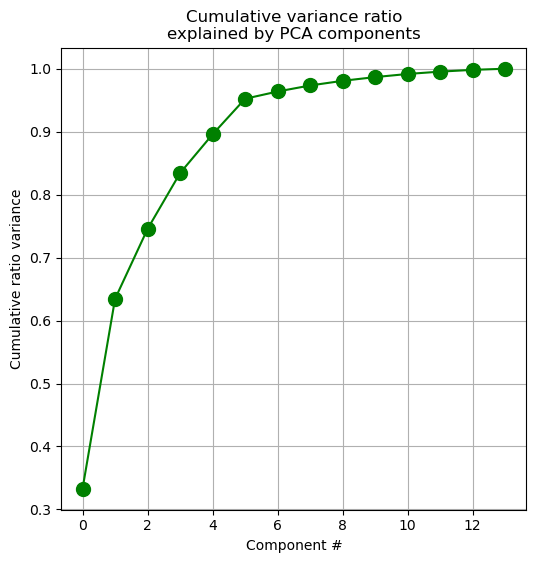

In [15]:
# plot explained variance cumulative sum
plt.subplots(figsize=(6, 6))
plt.plot(pca2.explained_variance_ratio_.cumsum(), 'g-o', markersize=10)
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio\nexplained by PCA components')
plt.savefig('graphs/PCA2_Explained_variance_cumsum.png')
plt.show()

In [117]:
pd.DataFrame(pca2.components_, columns=col_names).iloc[0:5,:].T.style\
    .background_gradient('PiYG', axis=None)

,0,1,2,3,4
home_completion_rate,0.080270,-0.347593,-0.167875,-0.464266,-0.300763
away_completion_rate,-0.226795,-0.286225,-0.200211,0.411593,-0.321846
home_hold_rate,0.320554,-0.250571,0.330073,0.130822,0.013909
away_hold_rate,-0.386037,-0.111402,0.345715,-0.103284,-0.006639
home_o_poss_per_hold,-0.207343,0.380163,-0.123097,-0.095120,-0.280753
away_o_poss_per_hold,0.336407,0.251726,-0.162763,0.061450,-0.154487
home_block_rate,0.236901,0.232819,0.184849,-0.458779,0.409429
away_block_rate,-0.120154,0.296233,0.157060,0.529018,0.365384
home_break_rate,0.390856,0.090575,-0.352286,0.135415,0.008109
away_break_rate,-0.329490,0.229078,-0.354157,-0.152949,0.095294


## PCA with everything

In [217]:
drop_cols = ['away_hucks_completed','away_hucks','home_hucks_completed','home_hucks', 
             'away_rz_scores', 'away_rz_possessions', 'home_rz_scores', 'home_rz_possessions',
             'away_huck_rate','away_rz_rate','home_huck_rate','home_rz_rate',
             'home_win','home_margin']

In [218]:
scaled_data = data.iloc[:,9:]
scaled_data.drop(columns=drop_cols,inplace=True)
scaled_data.dropna(inplace=True)
scaled_data.shape

(1320, 34)

In [219]:
# preserve col names
cols = scaled_data.columns
ind = scaled_data.index

# scale
scaled_data = scale(scaled_data)

# fit pca
pca = PCA().fit(scaled_data)

# confirm scale
scaled_data.mean(), scaled_data.std(ddof=0)

(2.5647932975297734e-17, 0.9999999999999999)

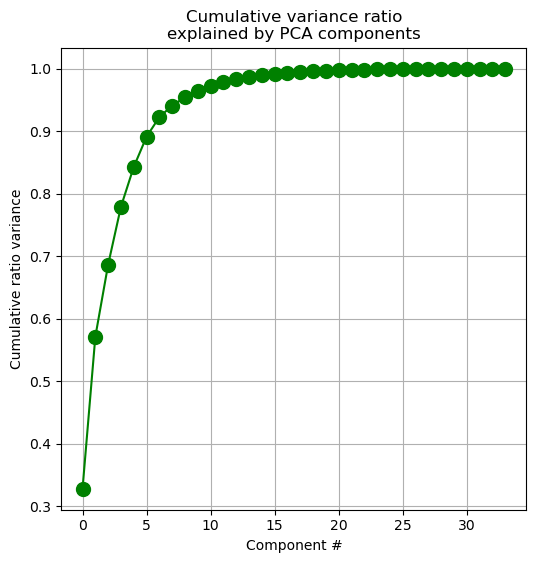

In [104]:
# plot explained variance cumulative sum
plt.subplots(figsize=(6, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), 'g-o', markersize=10)
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio\nexplained by PCA components')
plt.savefig('graphs/PCA3_Explained_variance_cumsum.png')
plt.show()

In [220]:
pca_x = pca.transform(scaled_data)

In [243]:
colors = ['g' if val else 'r' for val in data.loc[ind,'home_win'] ]

<Axes: >

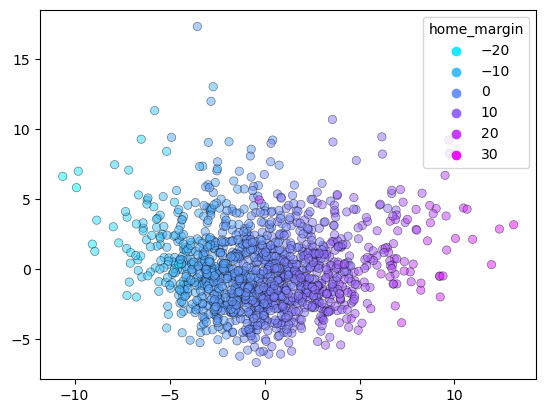

In [283]:
sns.scatterplot(x=x,y=y, hue = data.loc[ind,'home_margin'], 
                alpha=0.5, palette='cool', edgecolor='k')

Text(0.5, 1.0, 'PCA first two components, 57.2% variance explained')

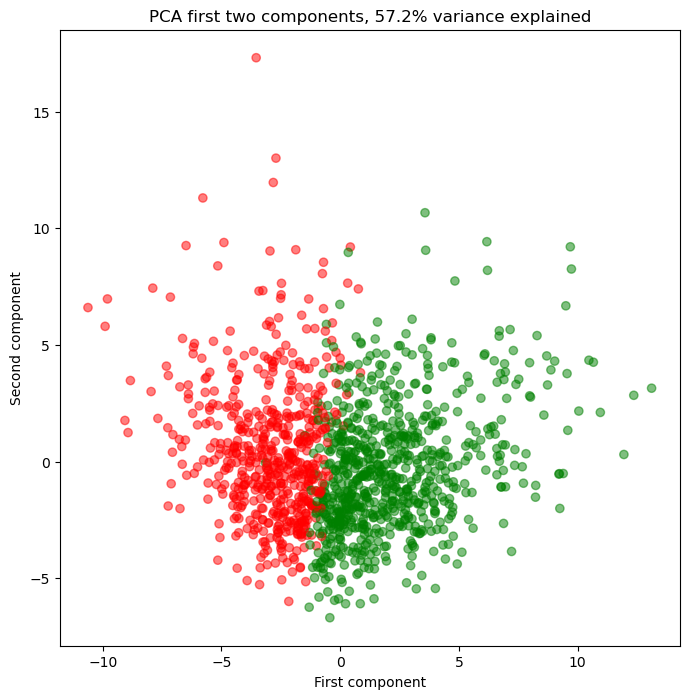

In [269]:

x = pca_x[:, 0]
y = pca_x[:, 1]
#state = state_summary_index
pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(8,8))
plt.scatter(x,y, alpha=0.5, c=colors)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'PCA first two components, {pc_var:.1f}% variance explained')

In [268]:
pca.explained_variance_ratio_

array([3.28220102e-01, 2.43376697e-01, 1.15247104e-01, 9.25480349e-02,
       6.36581661e-02, 4.83008031e-02, 3.13223216e-02, 1.84471488e-02,
       1.32881212e-02, 9.63213364e-03, 8.04724802e-03, 6.41960633e-03,
       4.74689422e-03, 3.26740824e-03, 2.80476686e-03, 2.13028305e-03,
       1.87542660e-03, 1.56495376e-03, 1.29166140e-03, 8.45478545e-04,
       6.44616284e-04, 5.11107052e-04, 4.72254444e-04, 3.12073642e-04,
       2.62800765e-04, 2.06469561e-04, 1.53045558e-04, 1.38196636e-04,
       1.20535616e-04, 8.16212014e-05, 3.24593670e-05, 3.04601435e-05,
       6.81788045e-32, 6.87264509e-34])

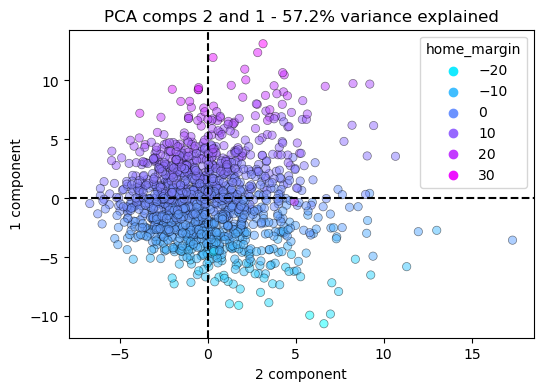

In [293]:
compA = 2
compB = 1

pc_var = round(100 * 
            (pca.explained_variance_ratio_[compA-1] 
             + pca.explained_variance_ratio_[compB-1])
               ,1)

x = pca_x[:, compA-1]
y = pca_x[:, compB-1]
#state = state_summary_index
#pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(6,4))
sns.scatterplot(x=x,y=y, hue = data.loc[ind,'home_margin'], 
                alpha=0.5, palette='cool', edgecolor='k')
plt.xlabel(f'{compA} component')
plt.ylabel(f'{compB} component')
plt.title(f'PCA comps {compA} and {compB} - {pc_var}% variance explained')

xb = plt.xlim()
yb = plt.ylim()

plt.plot(xb, [0,0], 'k--')
plt.plot([0,0],yb, 'k--')

plt.xlim(xb)
plt.ylim(yb)

plt.show()

In [ ]:
compA = 2
compB = 3

pc_var = round(100 * 
            (pca.explained_variance_ratio_[compA-1] 
             + pca.explained_variance_ratio_[compB-1])
               ,1)

x = pca_x[:, compA-1]
y = pca_x[:, compB-1]
#state = state_summary_index
#pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(8,8))
plt.scatter(x,y, alpha=0.5, c=colors)
plt.xlabel(f'{compA} component')
plt.ylabel(f'{compB} component')
plt.title(f'PCA comps {compA} and {compB} - {pc_var}% variance explained')

xb = plt.xlim()
yb = plt.ylim()

plt.plot(xb, [0,0], 'k--')
plt.plot([0,0],yb, 'k--')

plt.xlim(xb)
plt.ylim(yb)

plt.show()

C:\Users\Nish\anaconda3\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 0.92, 'PCA first three components, 68.7% variance explained')

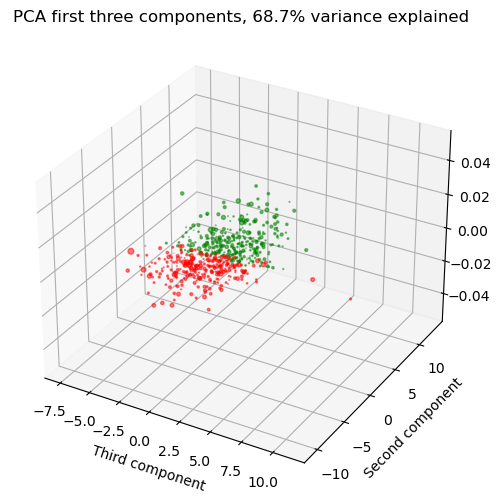

In [246]:

x = pca_x[:, 0]
y = pca_x[:, 1]
z = pca_x[:, 2]
#state = state_summary_index
pc_var = 100 * pca.explained_variance_ratio_.cumsum()[2]
plt.subplots(figsize=(6,6), subplot_kw={"projection": "3d"})
plt.scatter(z,x,y, alpha=0.5, c=colors)
plt.xlabel('Third component')
plt.ylabel('First component')
plt.ylabel('Second component')
plt.title(f'PCA first three components, {pc_var:.1f}% variance explained')

In [87]:
pca_x[:,0]

array([ 1.094381  , -4.86424785, -4.03684598, ..., -0.06201773,
        1.77636691,  5.41831904])

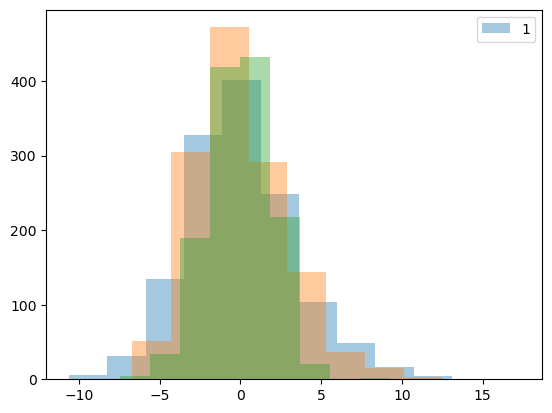

In [97]:
plt.hist(x, alpha=0.4, label='1')
plt.hist(y, alpha=0.4, label='2')
plt.hist(z, alpha=0.4, label='3')
plt.legend()
plt.show()

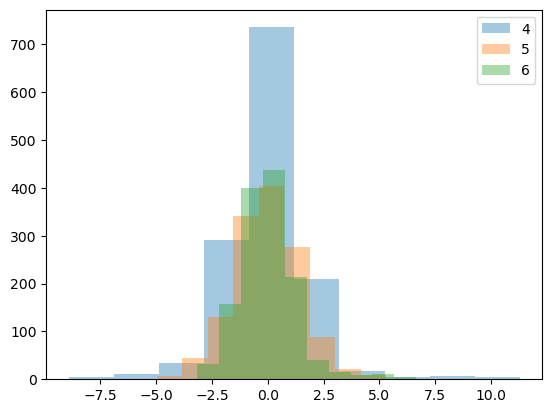

In [98]:
plt.hist(pca_x[:, 3], alpha=0.4, label='4')
plt.hist(pca_x[:, 4], alpha=0.4, label='5')
plt.hist(pca_x[:, 5], alpha=0.4, label='6')
plt.legend()
plt.show()

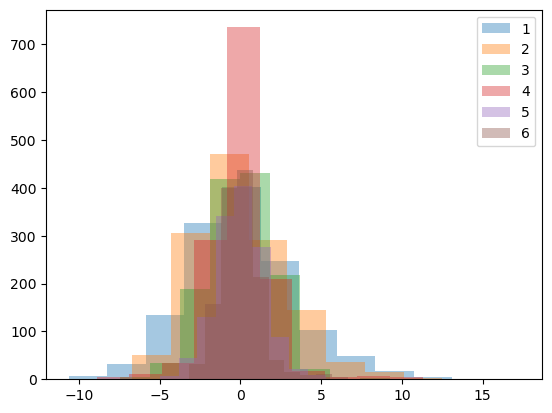

In [99]:
plt.hist(x, alpha=0.4, label='1')
plt.hist(y, alpha=0.4, label='2')
plt.hist(z, alpha=0.4, label='3')
plt.hist(pca_x[:, 3], alpha=0.4, label='4')
plt.hist(pca_x[:, 4], alpha=0.4, label='5')
plt.hist(pca_x[:, 5], alpha=0.4, label='6')
plt.legend()
plt.show()

In [112]:
pd.DataFrame(pca.components_, columns=cols).iloc[0:5,:].T.style\
    .background_gradient('PiYG', axis=None)

,0,1,2,3,4
away_completions,-0.036411,-0.154603,0.035187,0.369180,-0.262112
away_throws,-0.008973,-0.123515,0.006624,0.387384,-0.275748
away_blocks,-0.119442,0.214586,-0.167608,0.030874,-0.050887
away_turnovers,0.179900,0.224170,-0.186785,0.048755,-0.039106
away_o_scores,-0.071086,-0.236381,-0.324101,0.027777,0.119604
away_o_points,0.190651,-0.151140,-0.282096,0.058204,-0.121313
away_o_possessions,0.220535,0.010346,-0.304159,0.051023,-0.053956
away_d_scores,-0.240354,0.095789,-0.064857,-0.025172,-0.258983
away_d_points,-0.219192,-0.097061,-0.283441,0.000441,-0.107081
away_d_possessions,-0.204191,0.207728,-0.131163,0.006091,-0.089390


## Group by team?
### Team / Year

In [294]:
data['date'] = data.date.dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [295]:
data.head()

,game,date,tz,location,week,home,away,home_score,away_score,away_completions,...,home_block_rate,away_block_rate,home_break_rate,away_break_rate,home_d_poss_per_hold,away_d_poss_per_hold,home_break_per_poss,away_break_per_poss,home_rz_rate,away_rz_rate
2061,2014-04-12-SF-SJ,2014,CDT,NaN,1,Spiders,FlameThrowers,20,16,306.0,...,0.045455,0.029289,0.409091,0.222222,0.681818,0.777778,0.600000,0.285714,NaN,NaN
2059,2014-04-12-MIN-DET,2014,CDT,NaN,1,Mechanix,Wind Chill,21,30,242.0,...,0.035019,0.061224,0.173913,0.375000,0.347826,0.687500,0.500000,0.545455,NaN,NaN
2057,2014-04-12-MAD-CIN,2014,CDT,NaN,1,Revolution,Radicals,16,25,255.0,...,0.039286,0.061625,0.333333,0.592593,0.833333,0.962963,0.400000,0.615385,NaN,NaN
2058,2014-04-12-TOR-DC,2014,CDT,NaN,1,Breeze,Rush,19,20,326.0,...,0.014205,0.074468,0.263158,0.227273,0.578947,0.681818,0.454545,0.333333,NaN,NaN
2062,2014-04-12-VAN-SLC,2014,CDT,NaN,1,Lions,Riptide,14,29,32.0,...,0.265306,0.072874,0.062500,0.741935,0.562500,0.935484,0.111111,0.793103,NaN,NaN


In [296]:
wins = data.groupby(['home','date']).sum()['home_win']

C:\Users\Nish\AppData\Local\Temp\ipykernel_12804\1280318513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wins = data.groupby(['home','date']).sum()['home_win']


In [297]:
wins.drop(index='All-Stars',inplace=True)

In [298]:
wins.sort_values(ascending=False)[0:10]

home          date
Legion        2016    10
Spiders       2015     9
              2014     9
Empire        2022     9
              2019     9
Radicals      2015     9
              2018     9
Thunderbirds  2015     8
Legion        2018     8
Empire        2021     8
Name: home_win, dtype: int64

In [299]:
margin = data.groupby(['home','date']).sum()['home_margin']
margin.drop(index='All-Stars',inplace=True)
margin.sort_values(ascending=False)[0:10]

C:\Users\Nish\AppData\Local\Temp\ipykernel_12804\2091597142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  margin = data.groupby(['home','date']).sum()['home_margin']


home          date
Legion        2016    98
Rush          2014    96
              2015    92
Radicals      2016    89
              2015    84
              2018    81
Thunderbirds  2015    80
Radicals      2014    73
Spiders       2014    73
Empire        2022    70
Name: home_margin, dtype: int32

In [168]:
data.columns

Index(['game', 'date', 'tz', 'location', 'week', 'home', 'away', 'home_score',
       'away_score', 'away_completions', 'away_throws', 'away_hucks_completed',
       'away_hucks', 'away_blocks', 'away_turnovers', 'away_o_scores',
       'away_o_points', 'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions',
       'home_win', 'home_margin', 'home_completion_rate',
       'away_completion_rate', 'home_huck_rate', 'away_huck_rate',
       'home_hold_rate', 'away_hold_rate', 'home_o_poss_per_hold',
       'away_o_poss_per_hold', 'home_block_rate', 'away_block_rate',
       'home_break_rate', 'away_break_rate', 'home_d_poss_per_hold',
   

In [320]:
data2 = data.copy()

In [321]:
data2['home'] = data2.home.astype(str)

In [322]:
drop_cols = [ 'game','tz','location','week','away','home_score','away_score',
             'away_hucks_completed','away_hucks','home_hucks_completed','home_hucks', 
             'away_rz_scores', 'away_rz_possessions', 'home_rz_scores', 'home_rz_possessions',
             'away_huck_rate','away_rz_rate','home_huck_rate','home_rz_rate',
             ]

In [323]:
#data2 = data.iloc[:,9:]
data2.drop(columns=drop_cols,inplace=True)
data2 = data2[(data2.home != 'All-Stars')]
data2.dropna(inplace=True)
data2.shape

(1319, 38)

In [324]:
team_wins = data2.groupby(['home','date']).sum()['home_win']

In [327]:
# 
team_margin = data2.groupby(['home','date']).mean()['home_margin']

In [329]:
teamdata = data2.groupby(['home','date']).mean()

In [330]:
teamdata.drop(columns = ['home_margin','home_win'], inplace=True)

In [331]:
teamdata.T

home                   AlleyCats                                      \
date                        2014        2015        2016        2017   
away_completions      253.571429  288.571429  295.857143  260.428571   
away_throws           277.142857  313.000000  325.857143  286.142857   
away_blocks            12.571429   10.857143   13.000000   12.000000   
away_turnovers         23.571429   24.428571   30.000000   25.714286   
away_o_scores          16.142857   15.285714   16.714286   15.142857   
away_o_points          25.571429   25.428571   29.857143   26.142857   
away_o_possessions     33.285714   34.000000   40.000000   34.714286   
away_d_scores           5.428571    6.000000    6.428571    7.857143   
away_d_points          23.571429   23.285714   25.142857   25.142857   
away_d_possessions     13.714286   13.571429   15.142857   16.142857   
home_completions      225.285714  279.285714  244.428571  212.285714   
home_throws           245.000000  301.714286  269.571429  238.285714   
home_blocks            12.142857   12.142857   13.857143   13.142857   
home_turnovers         19.714286   22.428571   25.142857   26.000000   
home_o_scores          15.000000   16.142857   16.285714   15.571429   
home_o_points          21.428571   23.285714   25.142857   25.142857   
home_o_possessions     28.571429   30.714286   32.285714   33.142857   
home_d_scores           6.000000    7.142857   11.571429    8.428571   
home_d_points          22.857143   25.285714   29.714286   26.000000   
home_d_possessions     14.285714   18.000000   22.428571   18.714286   
home_completion_rate    0.919451    0.925434    0.905392    0.889745   
away_completion_rate    0.900940    0.923127    0.907013    0.906833   
home_hold_rate          0.708288    0.720135    0.667101    0.624856   
away_hold_rate          0.643575    0.620939    0.574540    0.586232   
home_o_poss_per_hold    2.000381    1.894914    1.977595    2.154213   
away_o_poss_per_hold    2.057201    2.360501    2.506624    2.344000   
home_block_rate         0.053189    0.038411    0.044050    0.047463   
away_block_rate         0.058340    0.035666    0.049474    0.049579   
home_break_rate         0.214796    0.263835    0.377796    0.317433   
away_break_rate         0.214788    0.228575    0.234668    0.305057   
home_d_poss_per_hold    0.564885    0.698456    0.750223    0.711733   
away_d_poss_per_hold    0.552445    0.592136    0.592311    0.644135   
home_break_per_poss     0.327286    0.349685    0.509312    0.475584   
away_break_per_poss     0.333911    0.405663    0.384619    0.489847   

home                                                                  \
date                        2018        2019        2021        2022   
away_completions      240.750000  245.428571  298.500000  267.166667   
away_throws           267.250000  261.571429  313.166667  283.333333   
away_blocks             9.375000    8.000000    8.000000    5.166667   
away_turnovers         26.500000   16.142857   14.666667   16.166667   
away_o_scores          16.000000   17.142857   16.500000   17.333333   
away_o_points          27.000000   24.285714   24.500000   28.166667   
away_o_possessions     34.750000   29.571429   28.166667   30.166667   
away_d_scores           3.875000    5.285714    6.333333    5.500000   
away_d_points          21.875000   24.571429   24.833333   24.500000   
away_d_possessions     13.500000   11.285714   10.833333    9.666667   
home_completions      268.000000  258.857143  251.333333  266.833333   
home_throws           289.375000  275.142857  267.000000  279.333333   
home_blocks            14.875000    9.571429    9.166667    9.500000   
home_turnovers         21.375000   16.285714   15.666667   12.500000   
home_o_scores          16.750000   17.000000   16.833333   18.000000   
home_o_points          21.875000   24.428571   24.833333   24.500000   
home_o_possessions     30.875000   29.000000   28.666667   28.500000   
home_d_scores           8.250000    5.2

In [332]:
# preserve col names
cols = teamdata.columns
inds = teamdata.index

# scale
team_scaled = scale(teamdata)

# fit pca
pca = PCA().fit(team_scaled)

# confirm scale
team_scaled.mean(), team_scaled.std(ddof=0)

(7.507161971194662e-17, 1.0)

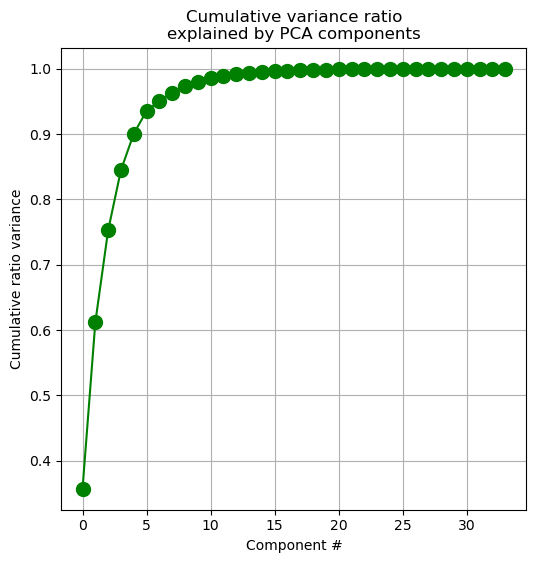

In [333]:
# plot explained variance cumulative sum
plt.subplots(figsize=(6, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), 'g-o', markersize=10)
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio\nexplained by PCA components')
plt.savefig('graphs/PCA_team-year_Explained_variance_cumsum.png')
plt.show()

In [318]:
team_wins.index == teamdata.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [334]:
team_margin.index == teamdata.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [335]:
team_x = pca.transform(team_scaled)

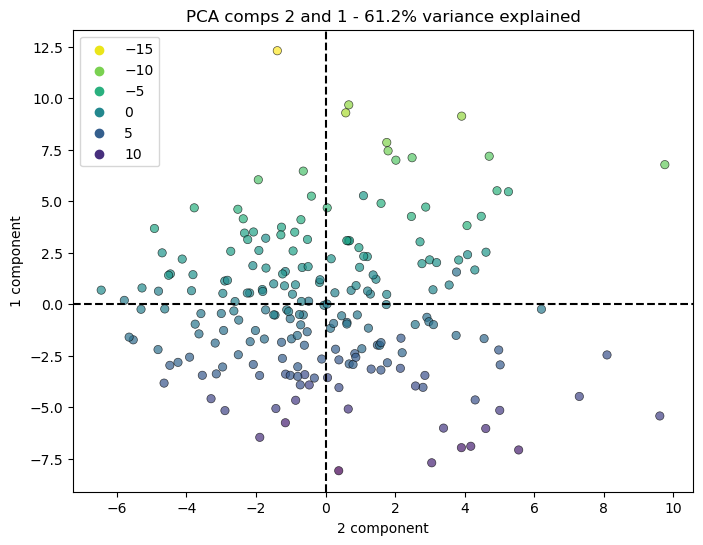

In [363]:
compA = 2
compB = 1

pc_var = round(100 * 
            (pca.explained_variance_ratio_[compA-1] 
             + pca.explained_variance_ratio_[compB-1])
               ,1)

x = team_x[:, compA-1]
y = team_x[:, compB-1]
#state = state_summary_index
#pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(8,6))
sns.scatterplot(x=x,y=y, hue = team_margin.values, #size=team_wins.values,
                alpha=0.7, palette='viridis_r', edgecolor='k')
plt.xlabel(f'{compA} component')
plt.ylabel(f'{compB} component')
plt.title(f'PCA comps {compA} and {compB} - {pc_var}% variance explained')

xb = plt.xlim()
yb = plt.ylim()

plt.plot(xb, [0,0], 'k--')
plt.plot([0,0],yb, 'k--')

plt.xlim(xb)
plt.ylim(yb)

# for s, x, y in zip(team_wins.index, x, y):
#     plt.annotate(f'{s[0]}-{s[1]}', (x+.03, y+.03), fontsize='x-small')

plt.show()